## Code Creates DM-R in Kahn, Williams & McQuinn (2022)

In [2]:
###################################################################################################
#
# DM_vs_R_plot.py 	                (c) Ian Williams, Adnan Khan, Matt McQuinn
#     				    	        ianw89@live.com
#
###################################################################################################
from cgmbrush.cgmbrush import *

#from cgmbrush import *
import numpy as np
import plotting_routines as makefig

M_chosen = [4,9,14]  #mass bins to consider;  Matt: would be great to make this masses rather than bin numbers
provider = BolshoiProvider()

# Specify resolution
resolution = 8  #how many times to oversample the original halo field grid
grid_size = resolution*1024 

load_data = False
load_DM_vs_rad = False
load_masks = False

series = []
date = '2021-11-22'
fire_date = '2021-11-22'
NFW = NFWProfile() #NFW profile class used for subtraction

config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=1)
config.datestamp = date
vir_rad_ar = config.get_virial_radii()
avg_mass_ar = config.get_halo_masses()

print ("Masses chosen for plotting: ")
print ("{:e}".format(avg_mass_ar[M_chosen[0]]))
print ("{:e}".format(avg_mass_ar[M_chosen[1]]))
print ("{:e}".format(avg_mass_ar[M_chosen[2]]))


# config = Configuration(SphericalTophatProfile(), 1, provider=provider, resolution=resolution)
# config.datestamp = date
# config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
# config.generate_profile_of_masks(load_from_files=load_masks)
# STH_DMvsR = config.DM_vs_R1
# STH_masks = config.mask_profiles
# config.clear_results()
# series.append((config.DM_vs_R1,config.mask_profiles,'3D Tophat','red'))

# config = Configuration(SphericalTophatProfile(), 2, provider=provider, resolution=resolution)
# config.datestamp = date
# config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
# config.generate_profile_of_masks(load_from_files=load_masks)
# STH_2_DMvsR = config.DM_vs_R1
# STH_2_masks = config.mask_profiles
# config.clear_results()
# series.append((config.DM_vs_R1, config.mask_profiles, '3D Tophat 2$R_{vir}$', 'orange'))

print("load flags = ", load_DM_vs_rad, load_masks, load_data)
config = Configuration(FireProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = fire_date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
fire_DMvsR = config.DM_vs_R1
fire_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'FIRE', 'green'))

print("load flags = ", load_DM_vs_rad, load_masks, load_data)
config = Configuration(NFWProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
NFW_DMvsR = config.DM_vs_R1
NFW_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'NFW', 'blue'))

config = Configuration(PrecipitationProfile(), 1, provider=provider, resolution=resolution)
config.datestamp = date
config.generate_DM_vs_radius_profile(load_from_files=load_DM_vs_rad)
config.generate_profile_of_masks(load_from_files=load_masks)
P_DMvsR = config.DM_vs_R1
P_masks = config.mask_profiles
config.clear_results()
series.append((config.DM_vs_R1, config.mask_profiles, 'Precipitation', 'c'))

Initialized NFW Profile
Initialized NFW Profile
load_from_files =  True
Loading data from  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/STH1_256_2021-11-22.npz done
Masses chosen for plotting: 
1.191254e+11
1.266272e+12
1.343652e+13
load flags =  False False False
Initialized Fire Profile
Initialized NFW Profile
Generating DM vs R profile for box 0
load_from_files =  True
Loading data from  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/fire8_256_2021-11-22.npz done


/Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/cgmbrush.py:1202: RuntimeWarning: invalid value encountered in true_divide
  DM_mass_bin[i,:,:] = DM_mass_bin[i,:,:] / num_halos # finishing computing average


Generating Mask Profiles for box 0
load flags =  False False False
Initialized NFW Profile
Initialized NFW Profile
Generating DM vs R profile for box 0
load_from_files =  True
Loading data from  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/NFW8_256_2021-11-22.npz done


/Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/cgmbrush.py:1202: RuntimeWarning: invalid value encountered in true_divide
  DM_mass_bin[i,:,:] = DM_mass_bin[i,:,:] / num_halos # finishing computing average


Generating Mask Profiles for box 0
Initialized NFW Profile
Generating DM vs R profile for box 0
load_from_files =  True
Loading data from  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/precipitation8_256_2021-11-22.npz done
Generating Mask Profiles for box 0


/Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/cgmbrush.py:1202: RuntimeWarning: invalid value encountered in true_divide
  DM_mass_bin[i,:,:] = DM_mass_bin[i,:,:] / num_halos # finishing computing average


# Plotting functions to make radial profiles  (Matt -- we may want to pull these out of notebook)

In [9]:
#The plotting routines were here not in plotting routines.py

## Let's first plot the analtyic profiles in a few models

Initialized Fire Profile


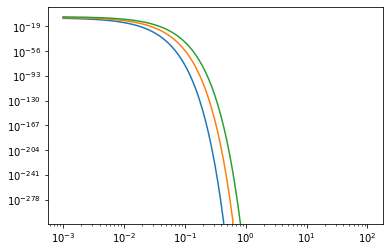

In [3]:
redshift = 0
df = provider.get_halos(redshift)
df, bin_markers = create_halo_array_for_convolution(df, 10**10, 9*10**15, 30)

fp = FireProfile()
for j in range(0,len(bin_markers) -1):
    Mvir_avg = np.mean((df['Mvir'][bin_markers[j]:bin_markers[j+1]])) / cosmo.h
    conv_rad = halo.comoving_radius_for_halo(cosmo, Mvir_avg, redshift) # comoving radius

    rvals, density = fp.get_analytic_profile(Mvir_avg, conv_rad)

    if j in M_chosen:
        plt.loglog(rvals, density)

## This makes the DM versus radius plot in Kahn ++ 2022

No handles with labels found to put in legend.


Initialized Fire Profile
saving output to  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/DMvsRad_profiles_8_999.pdf


No handles with labels found to put in legend.


saving output to  /Users/matt/Dropbox/CGMBrush/cgm-brush/cgmbrush/var/DMvsRad_profiles_8_999_error.pdf
8 8192 [4, 9, 14] [0.06849463 0.08025015 0.09393067 0.10991324 0.1286885  0.15059953
 0.17629975 0.20634544 0.24161205 0.28295276 0.33094703 0.38736617
 0.45372261 0.53077533 0.62177586 0.7293466  0.85063481 0.99538418
 1.16550325 1.36146526 1.59915484 1.88291827 2.11462326 2.68123239
 0.         0.         0.         0.         0.        ]
[4097.42541784    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.  

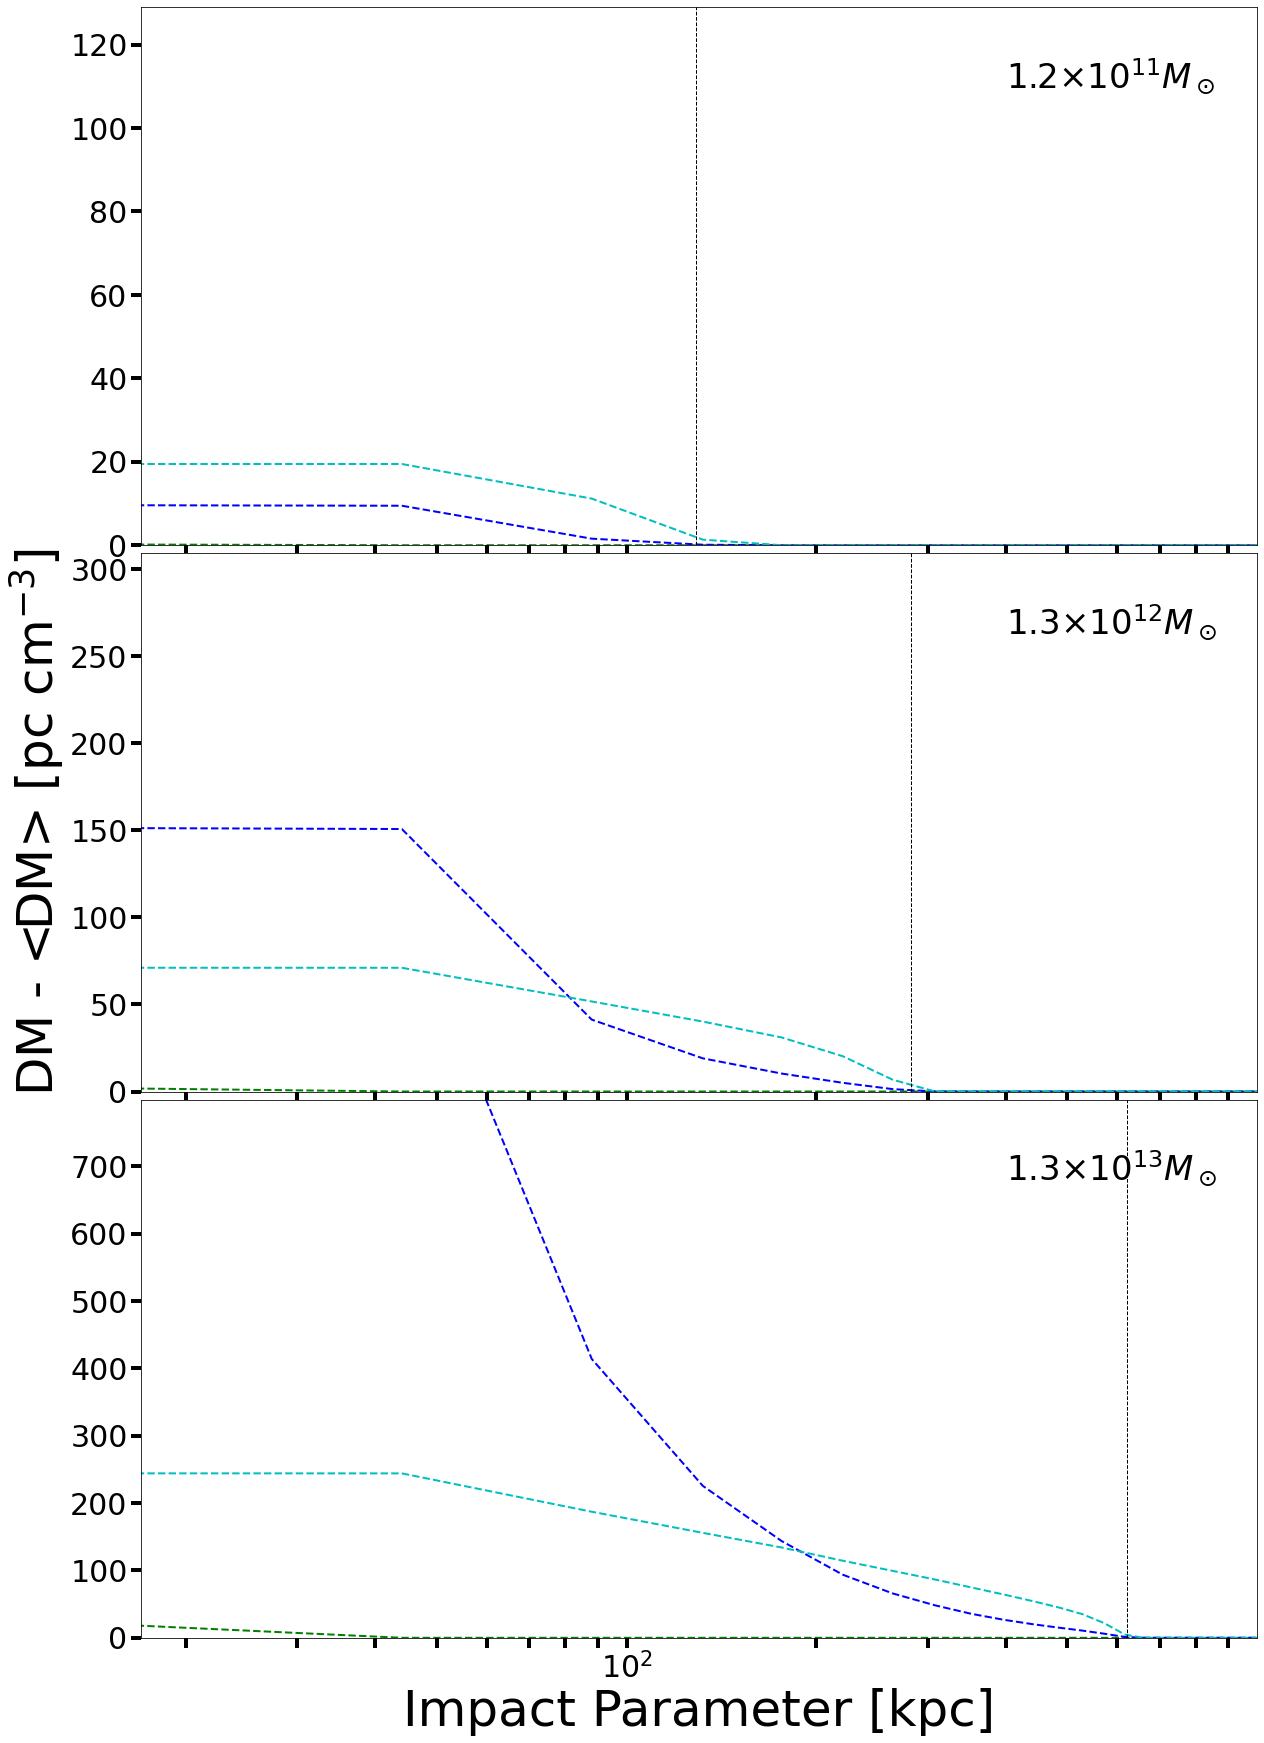

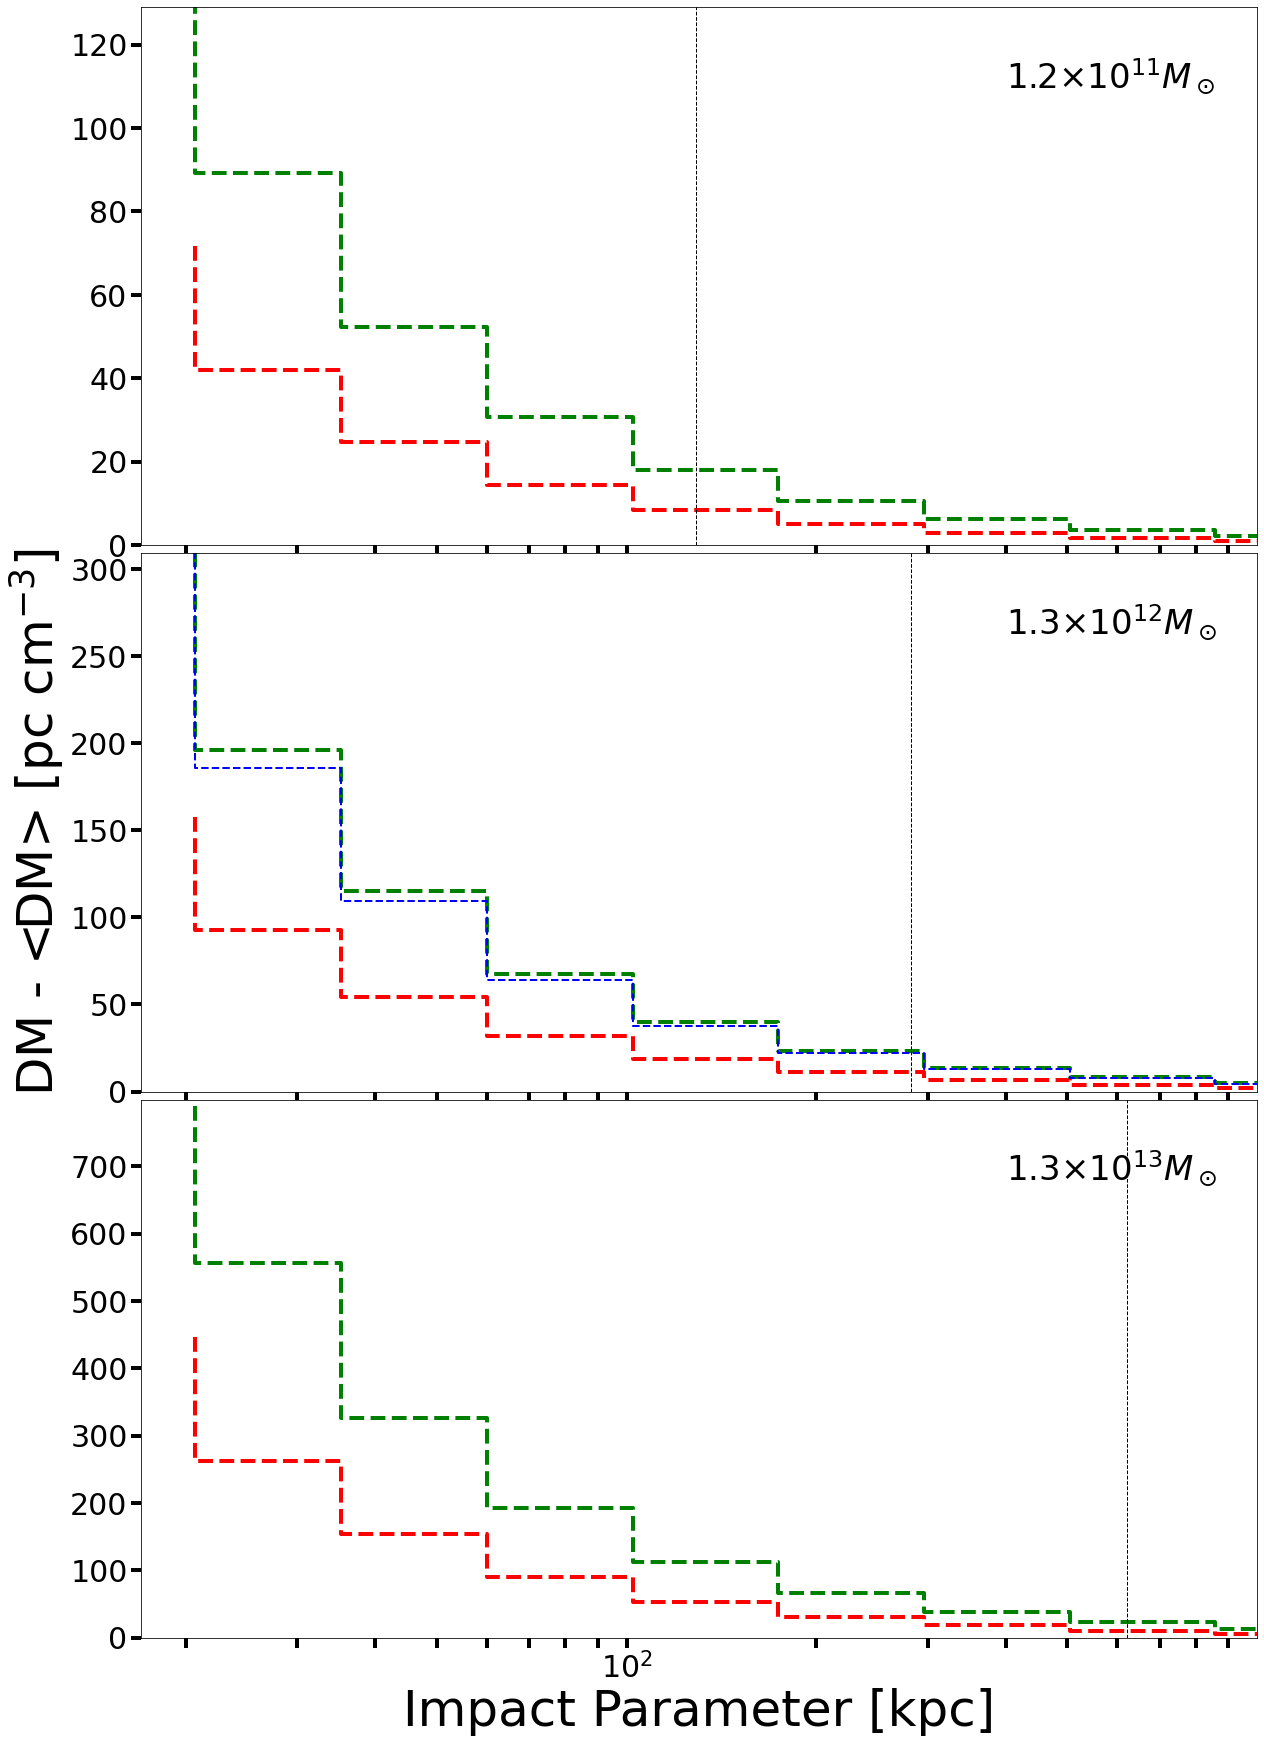

In [4]:

fp = FireProfile()
makefig.make_DM_vs_Rad_profiles_plots(series, False, 17, 999, resolution, grid_size, M_chosen,vir_rad_ar, provider)
makefig.make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 17, 999, resolution, grid_size, M_chosen, vir_rad_ar, provider)

print(resolution, grid_size, M_chosen,vir_rad_ar)
for data in series:
    print(data[1][M_chosen[1],:])
#make_DM_vs_Rad_profiles_plots(series, False, 15, 899)
#make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 15, 899)

#make_DM_vs_Rad_profiles_plots(series, False, 15, 799)
#make_DM_vs_Rad_profiles_plots([series[0], series[2]], True, 15, 799)